In [26]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../resources')
from single_pad_transmon_pocket import TransmonPocket_Single
from spiral_CPW import NSpiral

In [3]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

In [4]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

In [5]:
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '9 um'

In [6]:
design.overwrite_enabled = True

design.delete_component('Q1')

options = dict()

q1 = TransmonPocket_Single(design,'Q1',options = dict(pad_width = '250um',
pocket_width = '300um',
pad_pocket_distance_top = '50um',
pos_x = '300um /2',
pad_height = '200um',
pos_y = '-270um /2'))

gui.rebuild()
gui.autoscale()

design.delete_component('spiral')
design.delete_component('spiral_cut')


ops = {
    'pos_x': '20um',
    'pos_y': '-20um',
    'n': '3',
    'width': '15um',
    'radius': '350um',
    'gap': '30um',
    'orientation': '0',
    'subtract': 'False',
    'n_turn':'5',
    'radi_turns' : '35um'}
NSpiral(design, 'spiral', ops)
NSpiral(design, 'spiral_cut', {**ops, **dict(subtract=True, width='30um')})
gui.rebuild()
gui.zoom_on_components(['spiral'])

11:38AM 08s INFO [delete_component]: Called delete_component Q1, but such a component is not in the design cache dictionary of components.
  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

11:38AM 08s INFO [delete_component]: Called delete_component spiral, but such a component is not in the design cache dictionary of components.
11:38AM 08s INFO [delete_component]: Called delete_component spiral_cut, but such a component is not in the design cache dictionary of components.
  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



In [7]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [8]:
c1.sim.setup.min_passes  = 5
c1.sim.setup.max_passes = 20
print(c1.sim.setup)

{'name': 'Setup', 'reuse_selected_design': True, 'reuse_setup': True, 'freq_ghz': 5.0, 'save_fields': False, 'enabled': True, 'max_passes': 20, 'min_passes': 5, 'min_converged_passes': 2, 'percent_error': 0.5, 'percent_refinement': 30, 'auto_increase_solution_order': True, 'solution_order': 'High', 'solver_type': 'Iterative'}


In [9]:
c1.sim.run(components=['Q1','spiral', 'spiral_cut'])#, open_terminations=[('Q1', 'readout'), ('Q1', 'bus1'), ('Q1', 'bus2')])
c1.sim.capacitance_matrix 

c1.sim._get_results_from_renderer()
c_mat = c1.sim.capacitance_matrix

INFO 11:47AM [connect_project]: Connecting to Ansys Desktop API...
INFO 11:47AM [load_ansys_project]: 	Opened Ansys App
INFO 11:47AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 11:47AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Berkelium/Documents/Ansoft/
	Project:   Project11
INFO 11:47AM [connect_design]: No active design found (or error getting active design).
INFO 11:47AM [connect]: 	 Connected to project "Project11". No design detected
INFO 11:47AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
WARNING 11:47AM [connect_setup]: 	No design setup detected.
WARNING 11:47AM [connect_setup]: 	Creating Q3D default setup.
INFO 11:47AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 11:47AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 11:47AM [analyze]: Analyzing setup Setup
INFO 11:50AM [get_matrix]: Exporting matrix data to (C:\Users\BERKEL~1\AppData\

In [10]:
c_mat

,ground_main_plane,n_spiral_spiral,pad_top_Q1
ground_main_plane,1177.22611,-1046.06464,-75.16839
n_spiral_spiral,-1046.06464,1079.20633,-27.26548
pad_top_Q1,-75.16839,-27.26548,104.57046


In [ ]:
75*1e-12

INFO 11:58AM [connect_project]: Connecting to Ansys Desktop API...
INFO 11:58AM [load_ansys_project]: 	Opened Ansys App
INFO 11:58AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 11:58AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Berkelium/Documents/Ansoft/
	Project:   Project11
INFO 11:58AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 11:58AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 11:58AM [connect]: 	Connected to project "Project11" and design "Design_q3d" 😀 

11:58AM 26s WARNING [activate_ansys_design]: The design_name=readout was not in active project.  Designs in active project are: 
['Design_q3d'].  A new design will be added to the project.  
INFO 11:58AM [connect_design]: 	Opened active design
	Design:    readout [Solution type: Eigenmode]
WARNING 11:58AM [connect_setup]: 	No design setup detected.
WARNING 11:58AM [connect_setup]: 	Creating eigenmode default set

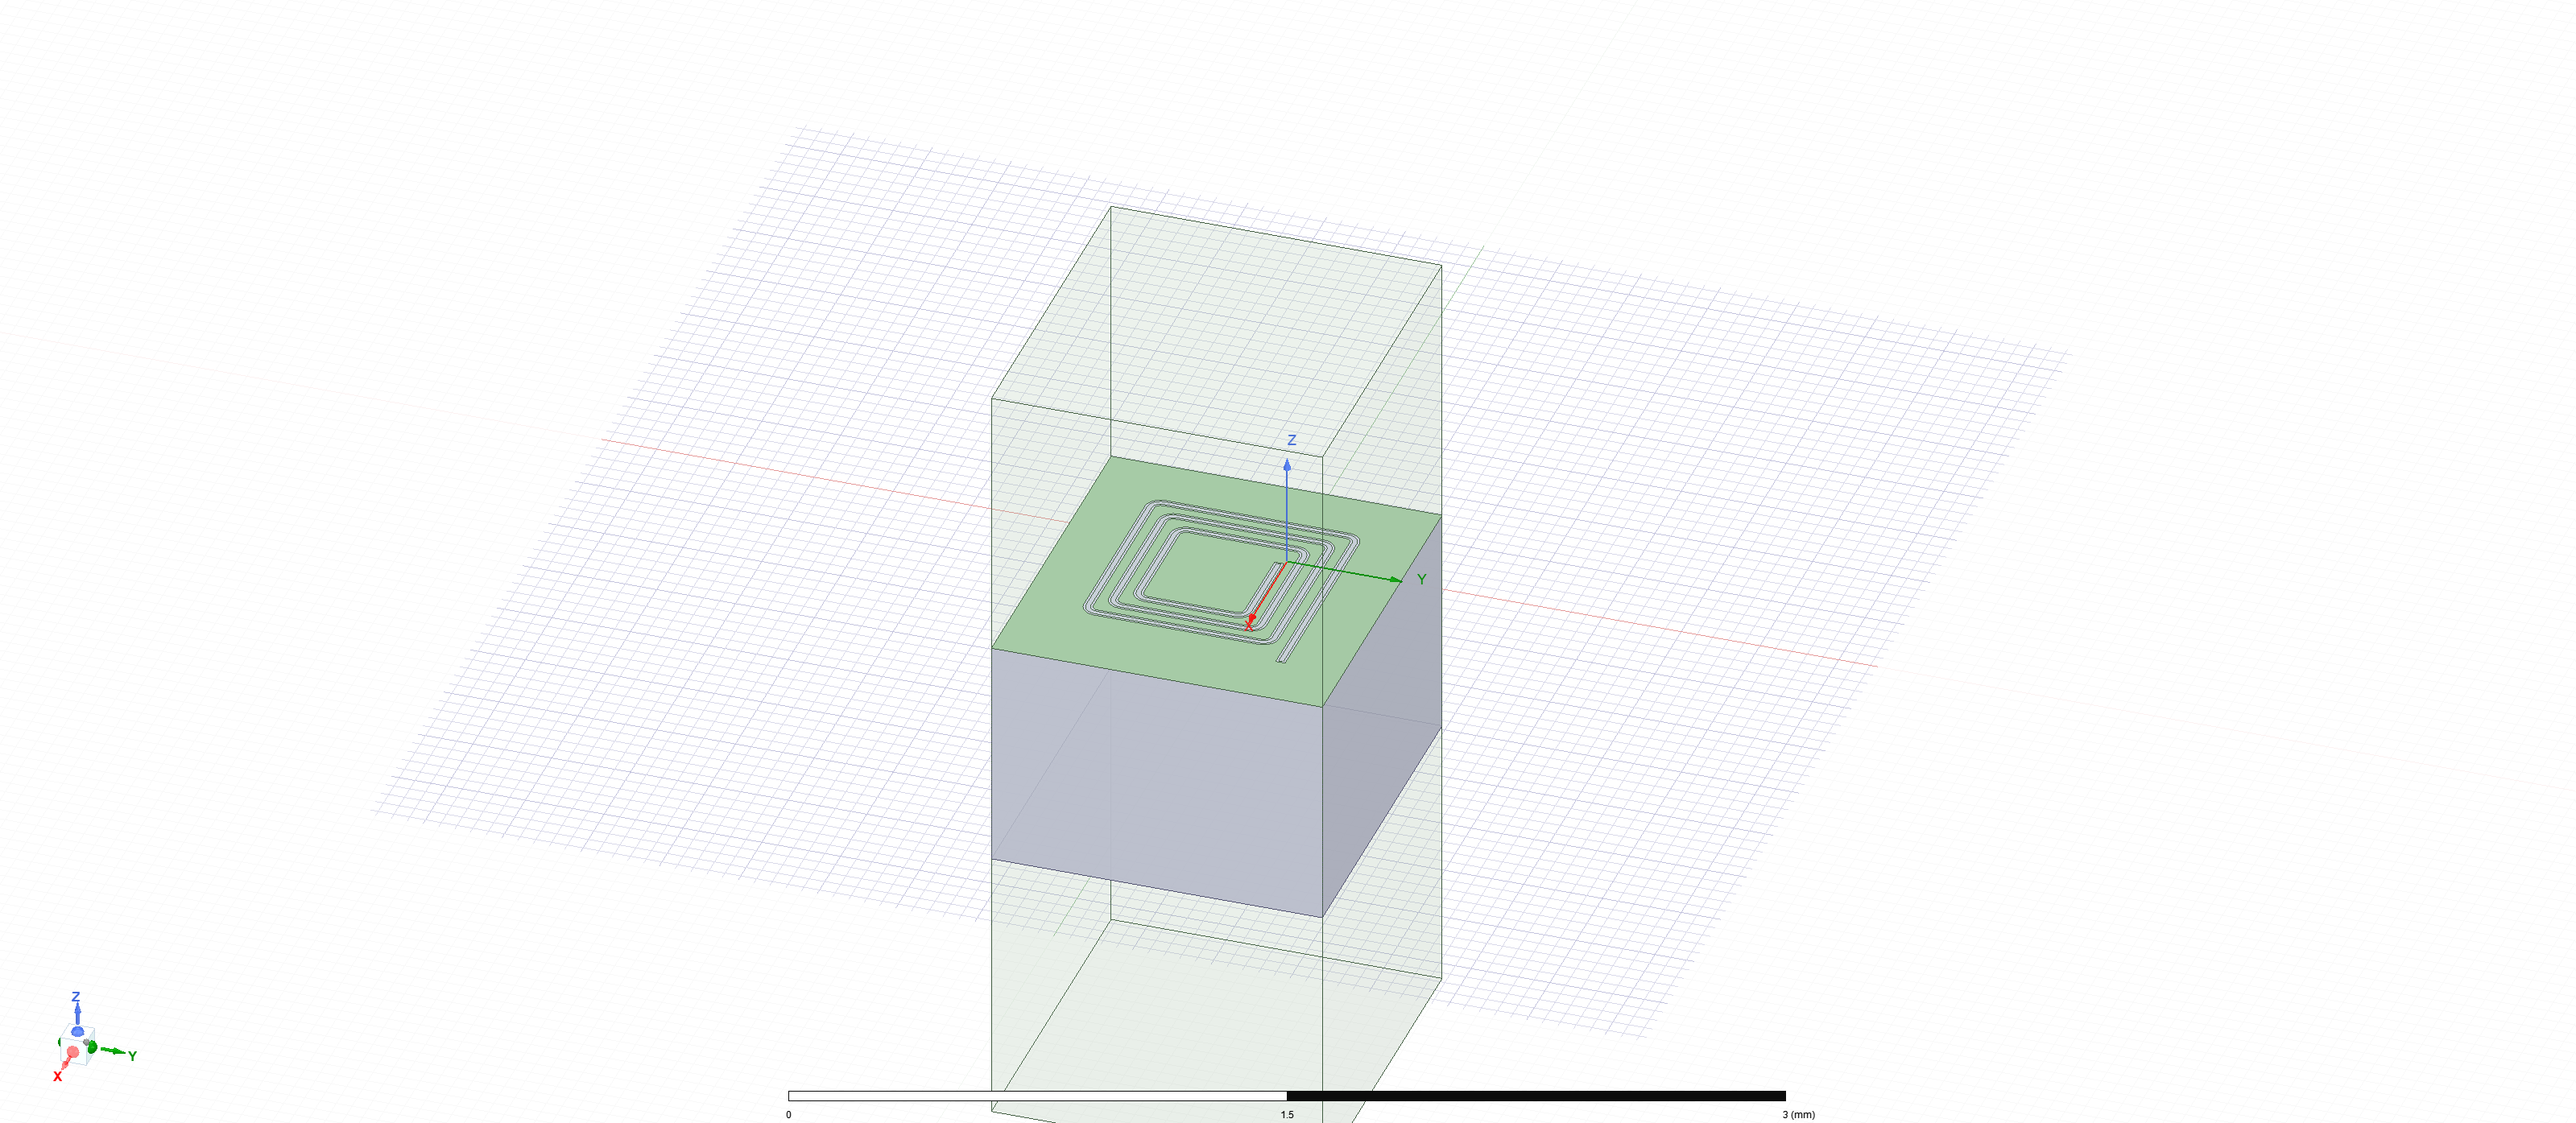

INFO 11:58AM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 0.1



In [11]:
from qiskit_metal.analyses.quantization import EPRanalysis

design.delete_component('Q1')
eig_res = EPRanalysis(design, "hfss")

hfss = eig_res.sim.renderer
hfss.start()

hfss.activate_ansys_design('readout','eigenmode')

hfss.render_design(['spiral','spiral_cut'],[])
hfss.save_screenshot()

setup = hfss.pinfo.setup
setup.passes = 20

print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss.pinfo.design.set_variable('Lj', '10 nH')
hfss.pinfo.design.set_variable('Cj', '0 fF')

setup.analyze()

In [90]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = hfss.get_convergences()
eig_res.sim.plot_convergences()

04:39PM 26s INFO [get_f_convergence]: Saved convergences to c:\Users\Berkelium\Desktop\Qiskit Files\Qiskit_metal_tutorial\tutorials\4 Analysis\A. Core - EM and quantization\hfss_eig_f_convergence.csv


04:40PM 18s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


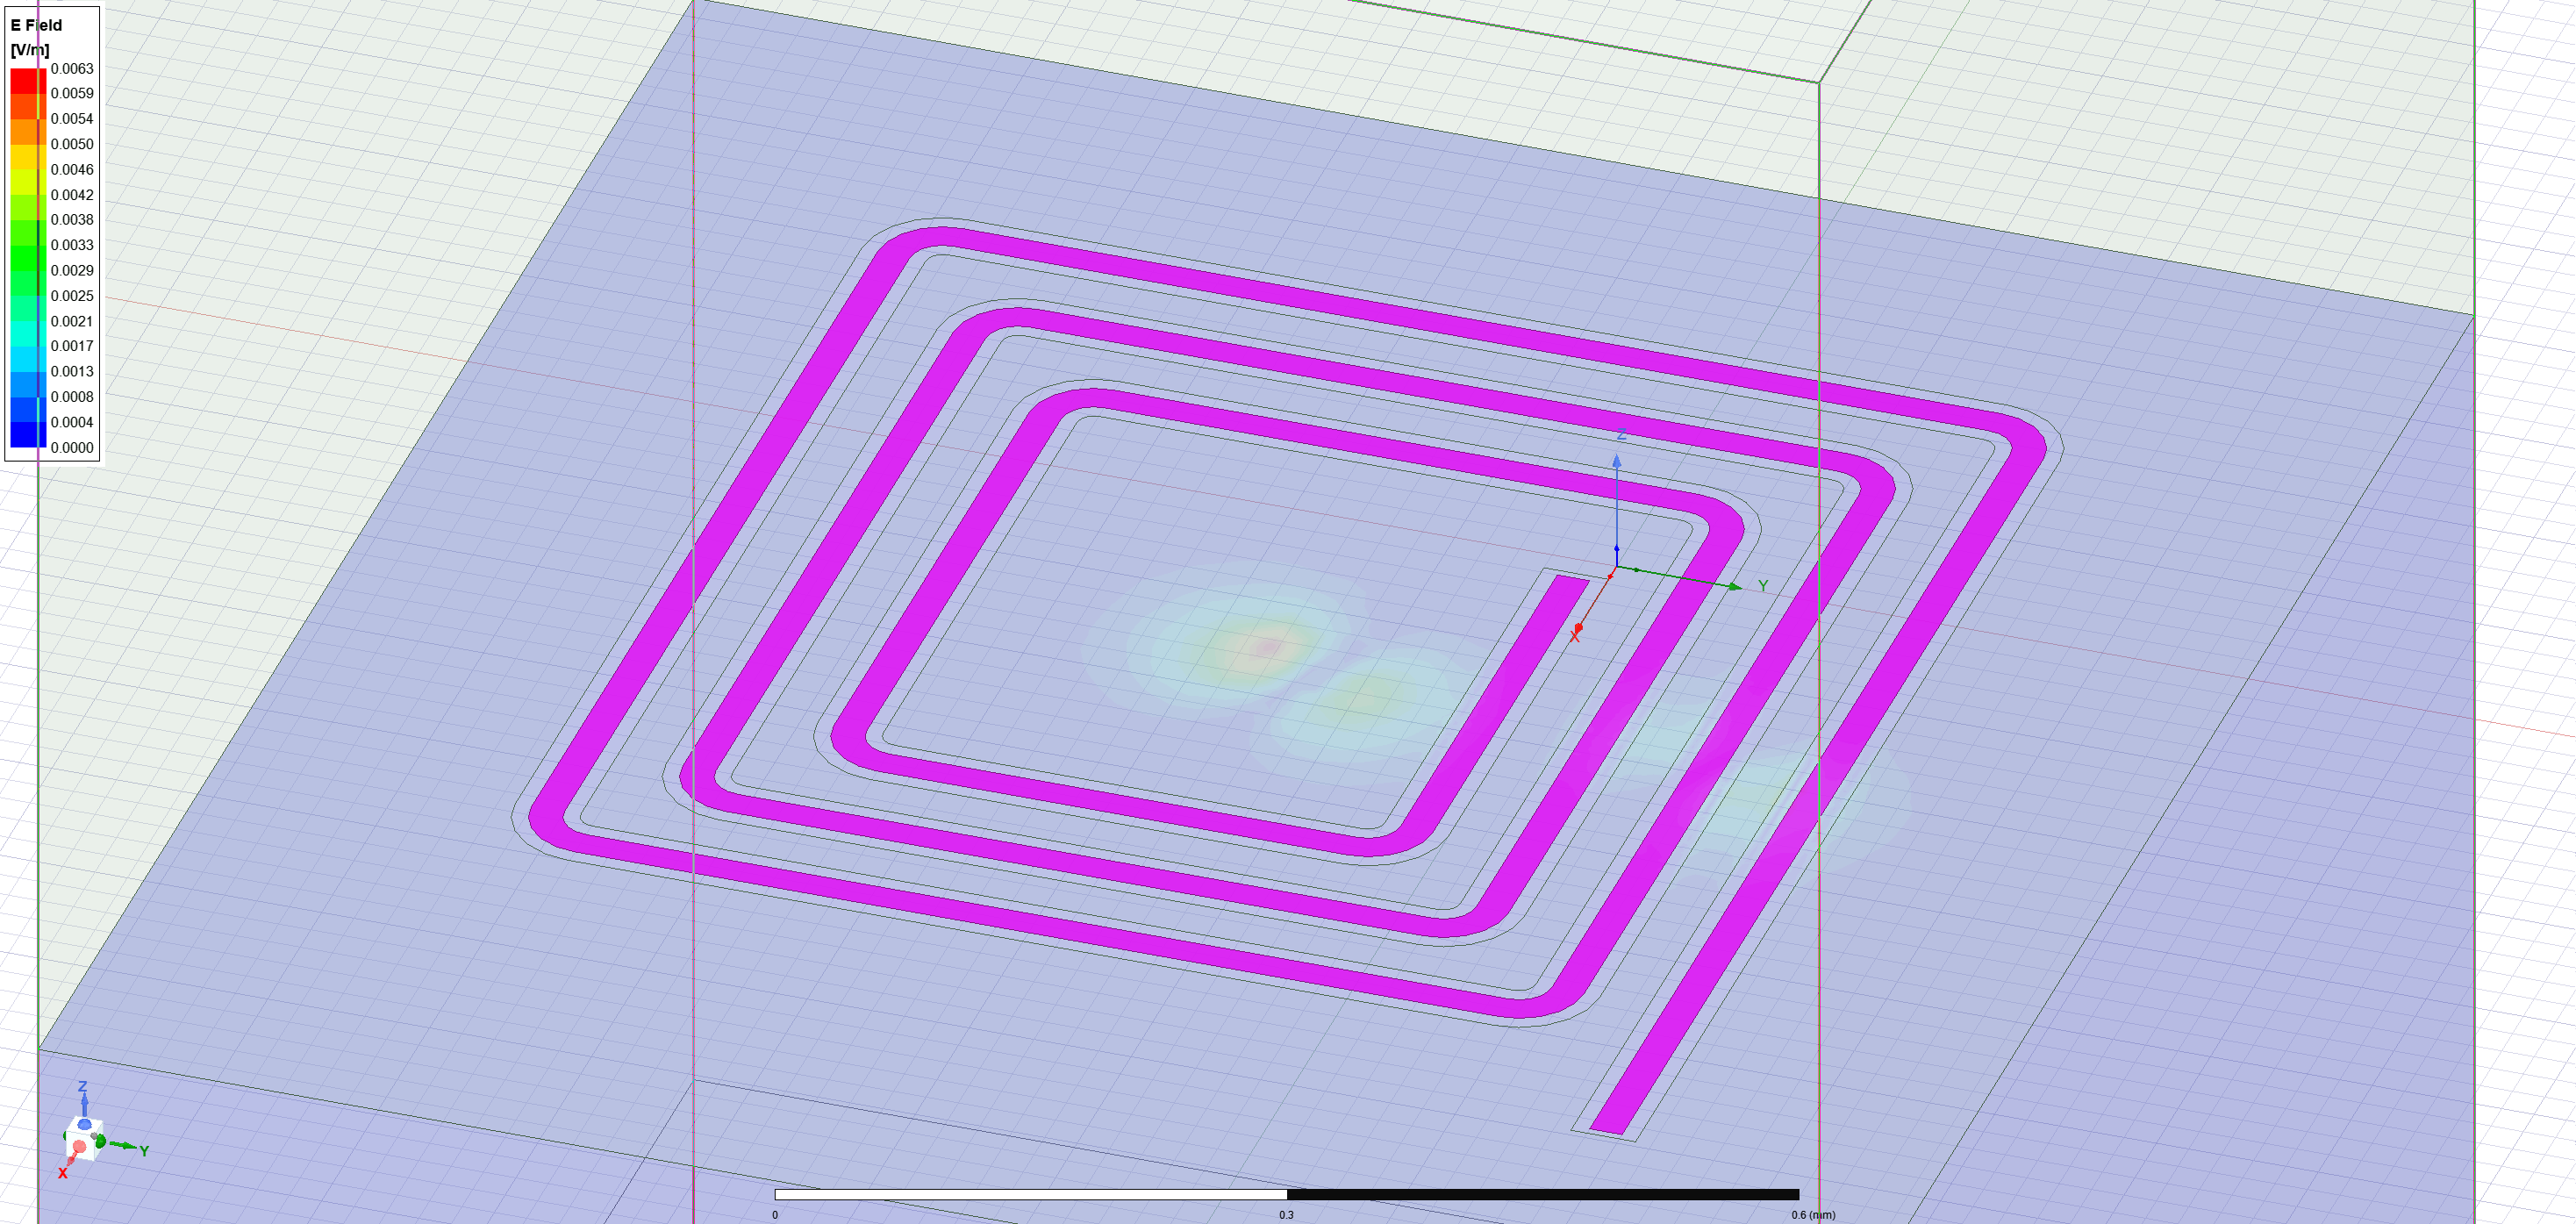

WindowsPath('c:/Users/Berkelium/Desktop/Qiskit Files/Qiskit_metal_tutorial/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [91]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [99]:
 hfss.clean_active_design()

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5,
 'max_delta_s': 0.1,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'},
 'sweep_setup': {'name': 'Sweep',
  'start_ghz': 2.0,
  'stop_ghz': 8.0,
  'count': 101,
  'step_ghz': None,
  'type': 'Fast',
  'save_fields': False}}

In [51]:
import numpy as np
import scipy.linalg as la
import qutip as q
import astropy.units as u
import astropy.constants as con

class Single_Transmon_Circuit:
    ## Default constant
    eq = 1.602e-19*u.C 
    epsilon = con.eps0
    h = 6.636/10**34
    hbar = con.hbar
    kb = con.k_B
    Tc = 1.2
    delta = 1.764*kb*Tc
    phi0 = con.h/2/eq
    dielectric = 9.34*epsilon
    def __init__(self,cap_mat,pad_name,CPW_name,ground_plane_name = 'ground_main_plane') -> None:
        self.c_couple = -cap_mat[pad_name][CPW_name]*u.fF
        self.c_to_ground = cap_mat[pad_name][pad_name]
        self.c_CPW = cap_mat[CPW_name][CPW_name]

In [54]:
Single_Transmon_Circuit(c_mat,'pad_top_Q1','n_spiral_spiral')